In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

In [2]:
# Путь к данным
data_dir = "E:/Курс нейросети/Выпускной проект/chest_xray"


In [3]:
# Создаем генераторы изображений с аугментацией
datagen = ImageDataGenerator(rescale=1./255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             validation_split=0.2)

In [4]:
# Загружаем и подготавливаем данные
train_generator = datagen.flow_from_directory(os.path.join(data_dir, 'train'),
                                              target_size=(128, 128),
                                              batch_size=32,
                                              class_mode='binary',
                                              subset='training')

val_generator = datagen.flow_from_directory(os.path.join(data_dir, 'train'),
                                            target_size=(128, 128),
                                            batch_size=32,
                                            class_mode='binary',
                                            subset='validation')


Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [5]:
# Создаем модель нейронной сети
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [6]:
# Компилируем модель
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# Создаем коллбек для сохранения лучшей модели
checkpoint = ModelCheckpoint("E:/Курс нейросети/Выпускной проект/best_model.h5",
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max')

In [8]:
# Засекаем время начала обучения
start_time = datetime.now()

In [9]:
# Обучаем модель
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=val_generator,
                    callbacks=[checkpoint])


Epoch 1/10


131/131 [==============================] - ETA: 0s - loss: 0.4039 - accuracy: 0.8545

E:\anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


131/131 [==============================] - 301s 2s/step - loss: 0.4039 - accuracy: 0.8545 - val_loss: 0.3074 - val_accuracy: 0.8754
Epoch 2/10
131/131 [==============================] - 264s 2s/step - loss: 0.2105 - accuracy: 0.9149 - val_loss: 0.2361 - val_accuracy: 0.8965
Epoch 3/10
131/131 [==============================] - 231s 2s/step - loss: 0.1884 - accuracy: 0.9226 - val_loss: 0.2703 - val_accuracy: 0.8945
Epoch 4/10
131/131 [==============================] - 219s 2s/step - loss: 0.1881 - accuracy: 0.9257 - val_loss: 0.1871 - val_accuracy: 0.9185
Epoch 5/10
131/131 [==============================] - 211s 2s/step - loss: 0.1784 - accuracy: 0.9281 - val_loss: 0.2037 - val_accuracy: 0.9137
Epoch 6/10
131/131 [==============================] - 212s 2s/step - loss: 0.1568 - accuracy: 0.9396 - val_loss: 0.2445 - val_accuracy: 0.8993
Epoch 7/10
131/131 [==============================] - 211s 2s/step - loss: 0.1642 - accuracy: 0.9343 - val_loss: 0.1759 - val_accuracy: 0.9233
Epoch 8/10

In [43]:
# Засекаем время окончания обучения
end_time = datetime.now()
training_time = end_time - start_time
print(f"Время обучения модели: {training_time}")


Время обучения модели: 14:25:28.884408


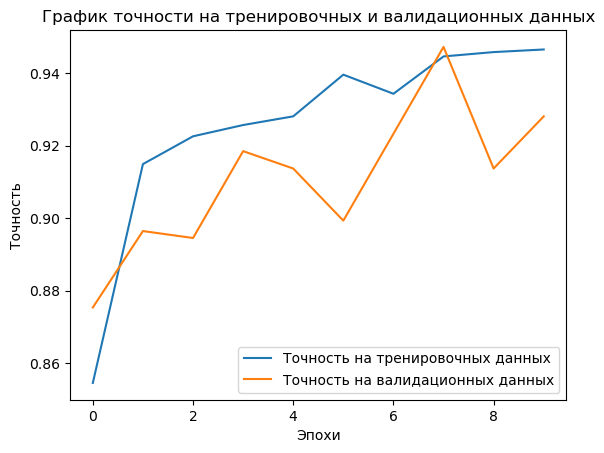

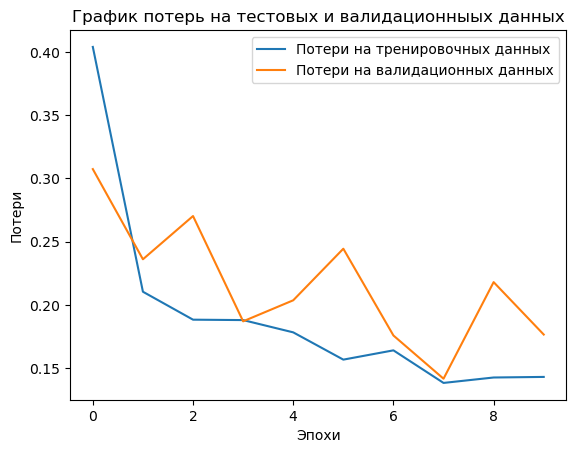

In [35]:
# Отображаем графики потерь и точности
plt.plot(history.history['accuracy'], label='Точность на тренировочных данных')
plt.plot(history.history['val_accuracy'], label='Точность на валидационных данных')
plt.title('График точности на тренировочных и валидационных данных')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Потери на тренировочных данных')
plt.plot(history.history['val_loss'], label='Потери на валидационных данных')
plt.title('График потерь на тестовых и валидационныых данных')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()



In [36]:
# Загружаем тестовые данные
test_generator = datagen.flow_from_directory(os.path.join(data_dir, 'test'),
                                             target_size=(128, 128),
                                             batch_size=32,
                                             class_mode='binary')

# Оцениваем модель на тестовых данных
evaluation_result = model.evaluate(test_generator)

print(f"Потери на тестовых данных: {evaluation_result[0]}, Точность на тестовых данных: {evaluation_result[1]}")

Found 624 images belonging to 2 classes.
20/20 [==============================] - 48s 2s/step - loss: 0.5024 - accuracy: 0.8125
Потери на тестовых данных: 0.5024486184120178, Точность на тестовых данных: 0.8125


In [12]:
# Сохраняем модель
model.save("E:/Курс нейросети/Выпускной проект/pneumonia_detection_model.h5")

1/1 [==============================] - 0s 144ms/step


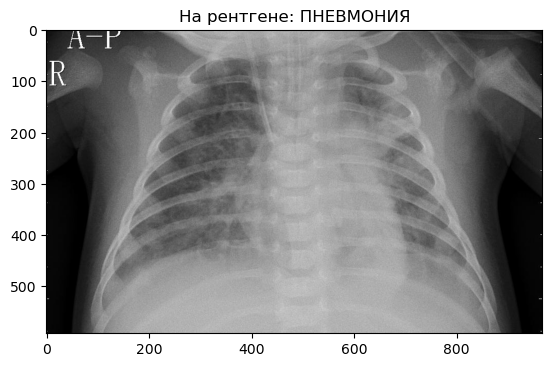

In [40]:
# Загружаем тестовое изображение и проверяем модель
from tensorflow.keras.preprocessing import image

test_image_path = "E:/Курс нейросети/Выпускной проект/PNEUMONIA/person1946_bacteria_4874.jpeg"
test_image = image.load_img(test_image_path, target_size=(128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)

if result[0][0] == 1:
    prediction = 'ПНЕВМОНИЯ'
else:
    prediction = 'НОРМА(здоров)'

# Выводим тестовое изображение и предсказание
plt.imshow(image.load_img(test_image_path))
plt.title(f"На рентгене: {prediction}")
plt.show()

1/1 [==============================] - 0s 104ms/step


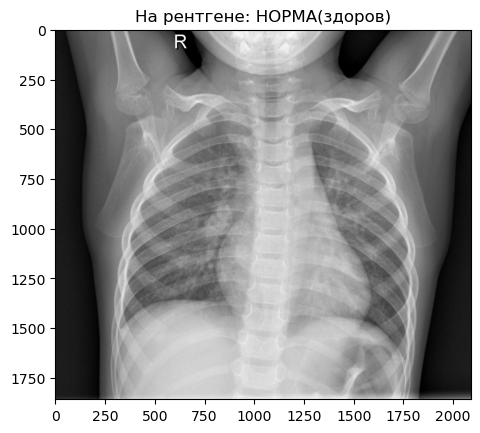

In [42]:
# Загружаем тестовое изображение и проверяем модель
from tensorflow.keras.preprocessing import image

test_image_path = "C:/Users/sofia/OneDrive/Desktop/НОРМА.jpeg"
test_image = image.load_img(test_image_path, target_size=(128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)

if result[0][0] == 1:
    prediction = 'ПНЕВМОНИЯ'
else:
    prediction = 'НОРМА(здоров)'

# Выводим тестовое изображение и предсказание
plt.imshow(image.load_img(test_image_path))
plt.title(f"На рентгене: {prediction}")
plt.show()